In [1319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt         
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [1320]:
df = pd.read_csv("concrete.csv")

In [1321]:
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [1322]:
df.shape

(1030, 9)

In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [1324]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

# visualization

<AxesSubplot:xlabel='strength', ylabel='Count'>

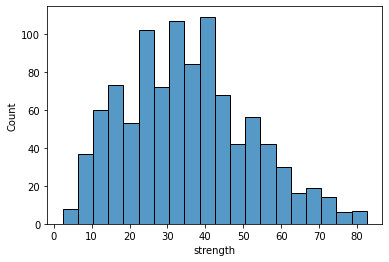

In [1328]:
sns.histplot(df['strength'],kde=False,bins=20)

<AxesSubplot:xlabel='water', ylabel='count'>

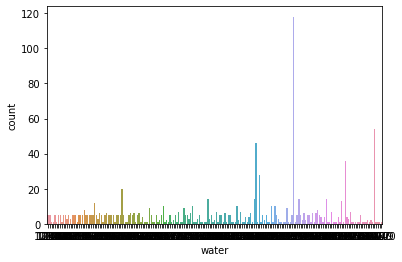

In [1329]:
sns.countplot(x="water",data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

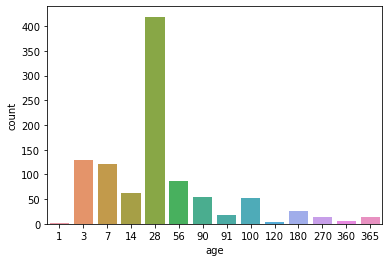

In [1330]:
sns.countplot(x = df["age"])

<AxesSubplot:xlabel='cement', ylabel='count'>

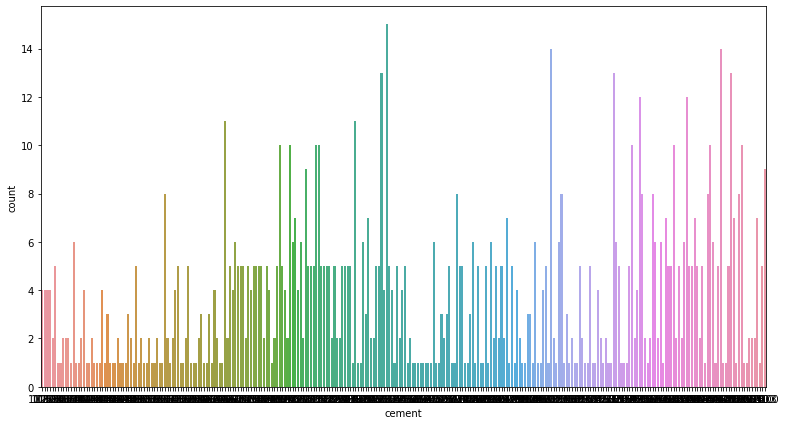

In [1331]:
plt.figure(figsize=(13, 7))
sns.countplot(x = df["cement"])

Text(0, 0.5, 'strength')

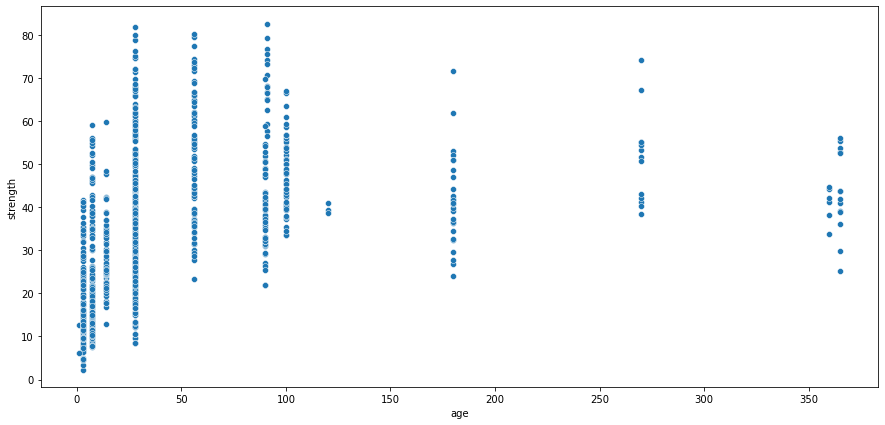

In [1332]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df["age"], y = df["strength"])
plt.xlabel('age')
plt.ylabel('strength')

In [1333]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

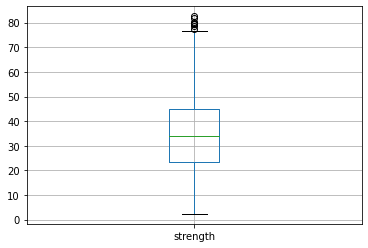

In [1334]:
df.boxplot(column=["strength"])
plt.show()

In [1267]:
lowcement,uppcement=remove_outlier(df['slag'])
df["slag"]=np.where(df['slag']>uppcement,uppcement,df['slag'])
df["slag"]=np.where(df['slag']<lowcement,lowcement,df['slag'])

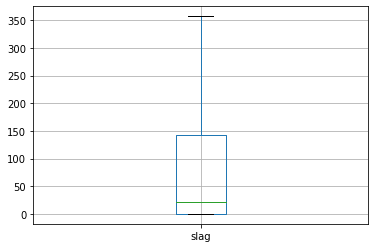

In [1268]:
df.boxplot(column=["slag"])
plt.show()

In [1269]:
lowcement,uppcement=remove_outlier(df['water'])
df["water"]=np.where(df['water']>uppcement,uppcement,df['water'])
df["water"]=np.where(df['water']<lowcement,lowcement,df['water'])

In [1270]:
lowcement,uppcement=remove_outlier(df['superplastic'])
df["superplastic"]=np.where(df['superplastic']>uppcement,uppcement,df['superplastic'])
df["superplastic"]=np.where(df['superplastic']<lowcement,lowcement,df['superplastic'])

In [1271]:
lowcement,uppcement=remove_outlier(df['fineagg'])
df["fineagg"]=np.where(df['fineagg']>uppcement,uppcement,df['fineagg'])
df["fineagg"]=np.where(df['fineagg']<lowcement,lowcement,df['fineagg'])

In [1272]:
lowcement,upplotfrontage=remove_outlier(df['age'])
df["age"]=np.where(df['age']>uppcement,uppcement,df['age'])
df["age"]=np.where(df['age']<lowcement,lowcement,df["age"])

In [1273]:
lowcement,uppcement=remove_outlier(df['strength'])
df["strength"]=np.where(df['strength']>uppcement,uppcement,df['strength'])
df["strength"]=np.where(df['strength']<lowcement,lowcement,df["strength"])

In [1274]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275239,-0.397467,-0.081617,0.079619,-0.109349,-0.225311,0.081946,0.498008
slag,-0.275239,1.000000,-0.323590,0.107031,0.043724,-0.284023,-0.283263,-0.044232,0.134621
ash,-0.397467,-0.323590,1.000000,-0.258379,0.395319,-0.009961,0.080962,-0.154371,-0.105577
water,-0.081617,0.107031,-0.258379,1.000000,-0.665260,-0.180249,-0.448979,0.279733,-0.290969
superplastic,0.079619,0.043724,0.395319,-0.665260,1.000000,-0.261624,0.216947,-0.197312,0.366235
coarseagg,-0.109349,-0.284023,-0.009961,-0.180249,-0.261624,1.000000,-0.176542,-0.003016,-0.165250
fineagg,-0.225311,-0.283263,0.080962,-0.448979,0.216947,-0.176542,1.000000,-0.156558,-0.169601
age,0.081946,-0.044232,-0.154371,0.279733,-0.197312,-0.003016,-0.156558,1.000000,0.329068
strength,0.498008,0.134621,-0.105577,-0.290969,0.366235,-0.165250,-0.169601,0.329068,1.000000


In [1275]:
x=df.drop(['strength'],axis=1)
y=df[['strength']]

In [1276]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [1277]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [1278]:
reg.score(x_train,y_train)

0.6061918486367966

In [1279]:
reg.score(x_test,y_test)

0.6333025361326158

In [1280]:
from sklearn.ensemble import  RandomForestRegressor

In [1281]:
c = RandomForestRegressor()

In [1282]:
c.fit(x_train,y_train)

RandomForestRegressor()

In [1283]:
c.score(x_train,y_train)

0.982911210092437

In [1284]:
c.score(x_test,y_test)

0.9027071272243677

In [1285]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [1289]:
ridge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
print("ridge model:",(ridge.coef_))

ridge model: [[ 0.1250924   0.10688173  0.08665017 -0.10069236  0.44270394  0.02389946
   0.03527958  0.11059532]]


In [1290]:
ridge.score(x_train,y_train)

0.6061918486268087

In [1291]:
ridge.score(x_test,y_test)

0.6333029343547288

In [1292]:
lasso=Lasso(alpha=0.3)
lasso.fit(x_train,y_train)
print("ridge model:",(lasso.coef_))

ridge model: [ 0.12466833  0.10630176  0.086385   -0.10597229  0.42098691  0.02278005
  0.03445164  0.11044194]


In [1293]:
lasso.score(x_train,y_train)

0.6061700517965138

In [1294]:
lasso.score(x_test,y_test)

0.63384908542118

In [1347]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [1348]:
xscaled=x.apply(zscore) # convert all attributes
xscaled.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,3.915961e-16,3.634633e-16,4.909773e-16,-1.237414e-16,7.116206e-16,1.186537e-15,3.794160e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.569712e-01,-8.471439e-01,-2.700633e+00,-1.061968e+00,-2.212138e+00,-2.249277e+00,-7.073594e-01
25%,-8.500535e-01,-8.569712e-01,-8.471439e-01,-7.845134e-01,-1.061968e+00,-5.265174e-01,-5.326075e-01,-6.123314e-01
50%,-7.915193e-02,-6.018232e-01,-8.471439e-01,1.629408e-01,4.154929e-02,-6.329352e-02,7.596735e-02,-2.797331e-01
75%,6.589606e-01,8.009107e-01,1.002278e+00,4.929000e-01,6.967624e-01,7.267605e-01,6.337754e-01,1.637312e-01
max,2.477915e+00,3.287734e+00,2.281084e+00,2.409020e+00,3.334858e+00,2.214224e+00,2.383350e+00,5.057677e+00


In [1359]:
x_train , x_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [1384]:
NNH =KNeighborsRegressor(n_neighbors=8,leaf_size=2,p=2)
NNH.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=2, n_neighbors=8)

In [1385]:
predicted_label=NNH.predict(x_test)
NNH.score(x_train,y_train)

0.7398671339285465

In [1386]:
NNH.score(x_test,y_test)

0.6994546546793918

In [1068]:
from sklearn.ensemble import BaggingRegressor

In [1182]:
b = BaggingRegressor(n_estimators=4,base_estimator=a)

In [1183]:
b.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=4)

In [1184]:
b.score(x_train,y_train)

0.9668388823583529

In [1185]:
b.score(x_test,y_test)

0.9237266344380728

# Pipelines

In [1301]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestRegressor
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([("scl",StandardScaler()),("clf",RandomForestRegressor(random_state=1))])
pipe_lr.fit(x_train,y_train)
print("test accuracy: %3f" %pipe_lr.score(x_test,y_test))

test accuracy: 0.930196


In [1302]:
print("test accuracy: %3f" %pipe_lr.score(x_train,y_train))

test accuracy: 0.985825


In [1303]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

pipe_svc=Pipeline([('scl',StandardScaler()),('svc',SVR())])
param_grid={'svc__C':[0.001,0.01,0.1,1,10,100],
           'svc__gamma':[0.001,0.01,0.1,1,10,100],
           }


In [1304]:
grid=GridSearchCV(pipe_svc,param_grid=param_grid,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('svc', SVR())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [1305]:
print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( x_test, y_test)))

 Best cross-validation accuracy: 0.87
 Best parameters:  {'svc__C': 100, 'svc__gamma': 0.1}
 Test set accuracy: 0.93


## Gridsearch

In [1306]:
from sklearn.model_selection import GridSearchCV

In [1307]:
param_grid = { "bootstrap":[True],
               "max_features":[2,3],
               "max_depth":[5,6],
               "min_samples_leaf":[3,4],
               "min_samples_split":[5,10],
               "n_estimators":[5,6,7]
    
}

In [1308]:
rf = RandomForestRegressor(random_state = 1)

In [1309]:
grid_search = GridSearchCV(estimator = rf,param_grid = param_grid,
                          cv=3,return_train_score=True)

In [1310]:
# fit the grid search to the data
grid_search.fit(x_train,y_train);

In [1311]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 7}

In [1312]:
best_grid = grid_search.best_estimator_
best_grid.score(x_test,y_test)

0.8580807617427667

In [1313]:
best_grid.score(x_train,y_train)

0.8733027792172018

In [1314]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [1315]:
rf.score(x_train,y_train)

0.9858291230837057

In [1316]:
rf.score(x_test,y_test)

0.9302350695178778

# RandomSearchCV

In [1210]:
import numpy as np



In [1211]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [1212]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [10, 15], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [1213]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [1214]:
best_random=rf_random.best_estimator_
best_random.score(x_test,y_test)


0.9150457692707353

In [1215]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [1216]:
x_train_norm

array([[0.33059361, 0.        , 0.62518741, ..., 0.83081395, 0.55983224,
        0.03571429],
       [0.25114155, 0.        , 0.62368816, ..., 0.82674419, 0.5560441 ,
        0.1510989 ],
       [0.48356164, 0.        , 0.56271864, ..., 0.36133721, 0.51112765,
        0.07417582],
       ...,
       [0.22054795, 0.37047919, 0.        , ..., 0.51569767, 0.62639518,
        0.00549451],
       [0.59497717, 0.52885624, 0.        , ..., 0.41773256, 0.43780018,
        0.24725275],
       [0.73744292, 0.29744666, 0.        , ..., 0.14854651, 0.79307312,
        0.24725275]])

In [1217]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

# numerical features
num_cols = ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age',]

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [1218]:
x_train_stand

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
310,-0.328496,-0.851593,1.106320,-1.806181,1.010587,1.472793,0.324892,-0.494974
894,-0.660492,-0.851593,1.101637,-1.062034,0.286859,1.454843,0.307392,0.164235
512,0.310690,-0.851593,0.911167,-0.545398,0.683187,-0.597793,0.099889,-0.275238
273,1.036692,1.329525,-0.846774,-1.682946,2.733750,-0.349066,-0.238865,-0.275238
281,1.896255,-0.851593,-0.846774,0.502095,-1.057208,-0.458044,-0.783872,-0.275238
...,...,...,...,...,...,...,...,...
360,-1.261518,0.752510,0.854963,0.549493,-0.023310,-1.024731,0.063639,-0.275238
466,1.505111,1.191041,-0.846774,0.217708,0.855503,-1.115760,-0.837623,-0.667624
299,-0.788329,0.676344,-0.846774,0.502095,-1.057208,0.083000,0.632396,-0.667624
493,0.776247,1.329525,-0.846774,-0.782387,0.941661,-0.349066,-0.238865,0.713576


In [1219]:
rf.fit(x_train_stand,y_train)

RandomForestRegressor(random_state=1)

In [1220]:
rf.score(x_train_stand,y_train)

0.98582494068746

In [1221]:
rf.score(x_test_stand,y_test)

0.9301963616858834

In [1222]:
from sklearn.tree import DecisionTreeRegressor

In [1223]:
b = DecisionTreeRegressor()

In [1224]:
b.fit(x_train_stand,y_train)

DecisionTreeRegressor()

In [1225]:
b.score(x_train_stand,y_train)

0.9958528400133728

In [1226]:
b.score(x_test_stand,y_test)

0.8957892750538793

In [1227]:

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [1228]:
print(x_test_norm)

[[0.42465753 0.53725079 0.         0.625      0.         0.38081395
  0.33497937 0.24450549]
 [0.31050228 0.         0.         0.56042435 0.         0.92151163
  0.52763309 0.07417582]
 [0.01438356 0.45442462 0.         0.73108856 0.         0.39883721
  0.68998174 0.01648352]
 [0.96575342 0.         0.         0.59732472 0.         0.94186047
  0.0514104  0.49175824]
 [0.41552511 0.04197272 0.70464768 0.5050738  0.21568627 0.11918605
  0.56010282 0.07417582]
 [0.30593607 0.         0.         0.63422509 0.         0.48546512
  0.78739092 0.49175824]
 [0.78538813 0.06715635 0.3948026  0.34824723 0.40392157 0.48255814
  0.31928567 0.07417582]
 [0.76940639 0.49527807 0.         0.56964945 0.43529412 0.24389535
  0.30819184 0.24725275]
 [0.66438356 0.         0.         0.625      0.         0.40406977
  0.44375296 0.00549451]
 [0.25776256 0.15054215 0.6091954  0.28920664 0.37647059 0.62005814
  0.50490428 0.03571429]
 [0.25776256 0.15054215 0.6091954  0.28920664 0.37647059 0.62005814
  

In [1229]:
x=df.drop(['strength'],axis=1)
y=df[['strength']]

In [1230]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(x,y,test_size=0.3,random_state=1)

In [1231]:
from sklearn.tree import DecisionTreeRegressor

In [1232]:
b = DecisionTreeRegressor()

In [1233]:
b.fit(x_train_norm,y_train_norm)

DecisionTreeRegressor()

In [1234]:
b.score(x_train_norm,y_train_norm)

0.9948531095488773

In [1235]:
b.score(x_test_norm,y_test_norm)

0.8626606207940709

In [1236]:
rf.fit(x_train_norm,y_train_norm)

RandomForestRegressor(random_state=1)

In [1237]:
rf.score(x_train_norm,y_train_norm)

0.9829690998152484

In [1238]:
rf.score(x_test_norm,y_test_norm)

0.9072112980492124